In [218]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 3]
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-notebook')

# Equações Diferenciais Ordinárias

Uma **equação diferencial** é uma equação que envolve uma função desconhecida e suas *derivadas*.

## Conteúdo: 

* Problema de Valor Inicial (PVI)
* Biblioteca `scipy.integrate.solve_ivp`
* Sistemas de EDO's
* Implementação de métodos numéricos: Euler, ponto médio, Runge-Kutta
* Exemplos
* Problema de Valor de Contorno (PVC)

## Exemplos de equações diferenciais:

$
\begin{array}{lr}
\dfrac{dN}{dt} = kN & \text{Crescimento exponencial} \\
\dfrac{dN}{dt} = kN \left(1-\dfrac{N}{c}\right) & \text{Crescimento logístico}\\
m\dot{v} = mg - kv & \text{Queda livre com atrito do ar}\\
\dfrac{\partial u}{\partial t} = \kappa^2 \dfrac{\partial^2 u}{\partial x^2} & \text{Equação do calor} \\
\dfrac{d^2y}{dx^2} = \dfrac{M(x)}{EI} & \text{Equação da linha elástica} \\
\left\{\begin{array}{l} \frac{dx}{dt} = x(\alpha - \beta y) \\
 \frac{dy}{dt} = y(\delta x - \gamma) \end{array} \right. & \text{Predador-presa}
\end{array}
$

Dizemos que uma equação diferencial é ordinária (EDO) se a função depende de uma única variável independente. 
Caso contrário, dizemos que ela é uma equação diferencial parcial (EDP).
* Na equação 1 temos um exemplo de EDO, onde $N$ depende apenas de uma variável ($t$).
* Na equação 4 a variável $u$ depende de $x$ e $t$, caracterizando uma EDP.

## Família de soluções

Uma característica importante de EDO's é que, quando existe, não há apenas uma única solução, mas sim uma família de soluções que resolvem uma EDO.

Por exemplo, dado a EDO:

$
u^{'''} = 0
$

qualquer polinônio na forma $u(x) = ax^2 + bx + c$ resolve a EDO dada.

Portanto, para resolver de forma única uma EDO é necessário impor condições adicionais no problema.

Uma EDO de ordem $m$ necessita de $m$ condições adicionais para ter solução única, onde a ordem $m$ é definida como a mais alta ordem de derivação que aparece na equação.

## Classificação de EDO

Nesta seção iremos aprender a resolver **Equações Diferenciais Ordinárias** (EDO's) utilizando métodos numericos.

Lembre-se que uma equação diferencial pode ser classificada quanto ao seu **tipo**, **ordem** e **linearidade**:

* **Tipo**: Pode ser do tipo ordinária (possui apenas 1 variável independente) ou parcial (possui mais de 1 variável independente)

Exemplo de equação diferencial ordinária:
\begin{equation}
\dfrac{dN}{dt} = k\cdot N (1 - N/r)
\end{equation}

Exemplo de equação diferencial parcial:
\begin{equation}
\dfrac{\partial u(t,x)}{\partial t} = c^2 \dfrac{\partial^2 u(t,x)}{\partial x^2}
\end{equation}

* **Ordem**: Podem ser de 1ª,  2ª, .. n-ésima ordem, dependendo da derivada de maior ordem presente na equação:
Exemplo de equação diferencial ordinária de 1º ordem:
\begin{equation}
\dfrac{dN}{dt} = k\cdot N (1 - N/r)
\end{equation}

Exemplo de equação diferencial ordinária de 2º ordem:
\begin{equation}
\dfrac{d^2y}{dt^2} = 0
\end{equation}

Exemplo de equação diferencial parcial de 2º ordem:
\begin{equation}
\dfrac{\partial^2 u}{\partial x^2} + 5\dfrac{\partial^2 u}{\partial y} + 3u = 0
\end{equation}

* **Linearidade**: Linear, se puder ser escrita como uma combinação linear das derivadas, ou não-linear, caso contrário.

Exemplo de equação diferencial ordinária de 1º ordem linear:
\begin{equation}
\dfrac{dQ(t)}{dt} = q\left(c - \dfrac{Q(t)}{V}\right)
\end{equation}

Exemplo de equação diferencial ordinária de 2º ordem linear:
\begin{equation}
\ddot{u} + 2\xi \omega_0 \dot{u} + \omega_0^2 u = 0
\end{equation}

Exemplo de equação diferencial ordinária de 1º ordem não-linear:
\begin{equation}
x' + p(t)x = q(t)x^n
\end{equation}

que, embora seja não-linear, é possível realizar a transformação $z = x^{1-n}$ e transformá-la em uma EDO linear.

Ou seja, dizemos que uma EDO é linear se é possível escrevê-la no formato:

\begin{equation}
a_n(t)\dfrac{d^ny}{dt^n} + a_{n-1}(t)\dfrac{d^{(n-1)}y}{dt^{(n-1)}} + \ldots + a_0(t)y = g(t)
\end{equation}

Também é possível termos um **sistema de equações diferenciais**, por exemplo:

\begin{array}{ll}
\dfrac{dx}{dt} & = x(\alpha - \beta y) \\
\dfrac{dy}{dt} & = y(\delta x - \gamma) 
\end{array}


## Problema de Valor Inicial (PVI)

Um problema de valor inicial é uma EDO onde os valores da função e suas derivadas (quando necessário) são todos conhecidos **no mesmo ponto**.

Caso, para uma EDO de ordem $m$, sejam dados os valores da função, bem como o de suas derivadas até a ordem $m-1$, todas elas no mesmo ponto, então dizemos que temos um Problema de Valor Inicial.

### Exemplos

$\left\{\begin{array}{c}
\dfrac{dy}{dt} = 5y \\
y(0) = 0
\end{array} \right.$

$\left\{\begin{array}{c}
m\dfrac{d^2y}{dt^2} + b\dfrac{dy}{dt} + ky = 0 \\
y(0) = c \\
y'(0) = 0
\end{array} \right.$


## Problema de Valor de Contorno (PVC)

Caso, para uma EDO de ordem $m$, sejam dados $m-1$ valores da função ou de suas derivadas, não necessariamente no mesmo ponto, então dizemos que temos um Problema de Valor de Contorno.

Uma característica dos PVC é que não é garantido a unicidade de solução.


Fontes consultadas:

* https://sites.google.com/view/projetoclculonumricoparatodos/m1?authuser=0
* http://paginapessoal.utfpr.edu.br/lcpereira/esta-e-uma-pasta/ma63b/Semana1_MA70G.pdf

## Solução de um PVI

```python
solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
```

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

### Decaimento exponencial

Cada átomo de uma substância radioativa tem uma certa probabilidade, por unidade de tempo, de se transformar num átomo mais leve, emitindo radiação no processo. 
Se $x$ for uma quantidade de massa de uma determinada substância radioativa, então a velocidade com que esta massa diminui é dada por:

$\dfrac{dx}{dt} = -px
$

onde $p$ é chamada de constante de decaimento.

Suponha que você tenha uma quantidade de 3000g de uma substância radioativa que possui uma constante de decaimento $p = 0.086$.

1. Plote o gráfico da massa pelo tempo (até $t = 100$).

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.633e-01 ...  9.432e+01  1.000e+02]
        y: [[ 3.000e+03  2.958e+03 ...  9.045e-01  5.548e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 74
     njev: 0
      nlu: 0


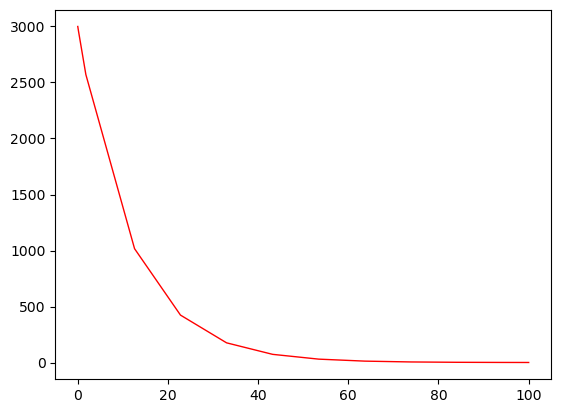

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m0 = 3000
p = 0.086
def decaimento_edo(t, x):
    # observe que são dados 2 parâmetros de entrada: t e x
    return -p*x

sol = solve_ivp(decaimento_edo, y0 = [m0], t_span = [0,100])

print(sol)
massa = sol.y[0]
tempo = sol.t
plt.plot(tempo, massa, 'r', lw=1)

2. Determine a massa após 30 dias

In [36]:
sol = solve_ivp(decaimento_edo, y0 = [m0], t_span = [0,30])
massa = sol.y[0]
print(sol.t)

[ 0.          0.16334293  1.79677222 12.59543997 22.77901369 30.        ]


In [37]:
tanterior = 0
for t in sol.t:
    print(t - tanterior)
    tanterior = t

0.0
0.1633429289199574
1.6334292891995736
10.798667747187224
10.183573722077046
7.220986312616198


3. Sabendo que a solução é dada por $m(t) = m_0e^{-pt}$, compare com o valor exato

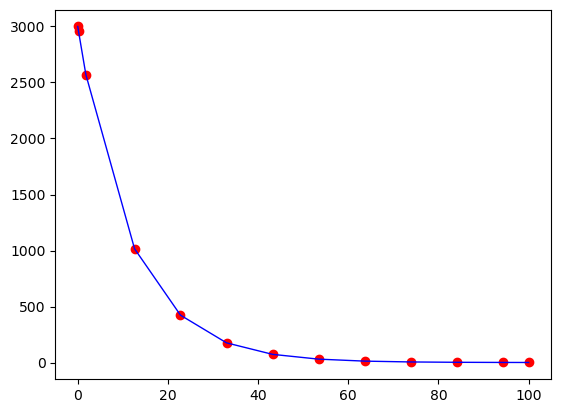

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m0 = 3000
p = 0.086

def decaimento_edo(t, x):
    # observe que são dados 2 parâmetros de entrada: t e x
    return -p*x

def decaimento_solucao(t, p, m0):
    return m0*np.exp(-p*t)
    
sol = solve_ivp(decaimento_edo, y0 = [m0], t_span = [0,100])
massa = sol.y[0]
tempo = sol.t
plt.plot(tempo, massa, 'ro', lw=1)

massa2 = decaimento_solucao(tempo, p, m0)
plt.plot(tempo, massa2, 'b', lw=1)


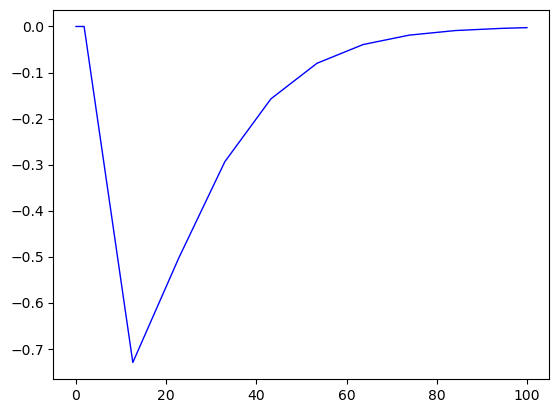

In [39]:
erro = massa2 - massa
plt.plot(tempo, erro, 'b', lw=1)

### Queda livre com atrito do ar

Considere um PVI da forma:

$
\dfrac{dy}{dt} = f(t,y)
$

Suponha que desejamos calcular a velocidade de um corpo rígido, inicialmente parado, em queda livre [CHAPRA, pg 4].
Sobre esse corpo agem duas forças: A força da gravidade e a resistência do ar.

Um modelo adequado para este cenário é:

$
F = ma = mg - c_d v^2
$

onde:

* $m$ é a massa do corpo;
* $g$ a aceleração da gravidade;
* $c_d$ é o coeficiente de arraste;
* $v$ é a velocidade do corpo;

Sabemos também que:

$
a = \dfrac{dv}{dt}
$

assim podemos chegar na equação:

$
\dfrac{dv}{dt} = g - \dfrac{c_d}{m}v^2
$

que encontra-se no formato ($g$, $c_d$ e $m$ são constantes):

$
\dfrac{dv}{dt} = f(t, v)
$

Como o corpo encontra-se inicialmente parado, temos que:

$
v(0) = 0
$

caracterizando-o como um PVI.

[CHAPRA] CHAPRA, S. C. , "Métodos Numéricos Aplicados com MATLAB para Engenheiros e Cientistas", 3ª ed., 2013. 

### Solução Numérica

Vamos resolver numericamente a EDO abaixo:

$
\dfrac{dv}{dt} = g - \dfrac{c_d}{m}v^2
$

e determinar o valor de $v(t)$

In [1]:
def quedalivre_edo(t, v):
    g = 9.81
    cd = 0.25
    m = 68.1
    dvdt =  g - cd/m*v**2
    return dvdt

Em seguida, podemos resolver o PVI utilizando a função `solve_ivp`

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04  1.100e-03  1.110e-02  1.111e-01
             1.111e+00  5.626e+00  8.392e+00  1.116e+01  1.511e+01
             1.967e+01  2.000e+01]
        y: [[ 0.000e+00  9.810e-04  1.079e-02  1.089e-01  1.090e+00
              1.074e+01  4.077e+01  4.759e+01  5.022e+01  5.136e+01
              5.163e+01  5.164e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 74
     njev: 0
      nlu: 0


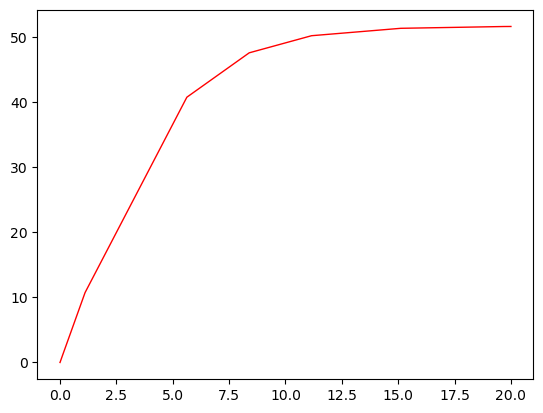

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

v0 = 0
sol = solve_ivp(quedalivre_edo, y0 = [v0], t_span = [0,20])

print(sol)
velocidade = sol.y[0]
tempo = sol.t
plt.plot(tempo, velocidade, 'r', lw=1)

### Solução analítica

Observe que é possível obter uma solução analítica para a EDO anterior, ou seja, encontrar uma função do tipo:

$
v(t) = f(t)
$

Utilizando a técnica, por exemplo, de separação de variáveis, podemos reescrever a EDO acima como:

$
\dfrac{dv}{1 - \left(\dfrac{v}{v_t}\right)^2} = g \cdot dt
$

onde $v_t = \sqrt{\frac{mg}{c_d}}$ o que, após integrarmos ambos os lados da equação, obtemos a solução:

$
v(t) = \sqrt{\dfrac{gm}{c_d}} \cdot \tanh \left(\sqrt{\dfrac{gc_d}{m}} \cdot t \right)
$

Text(0, 0.5, 'Velocidade')

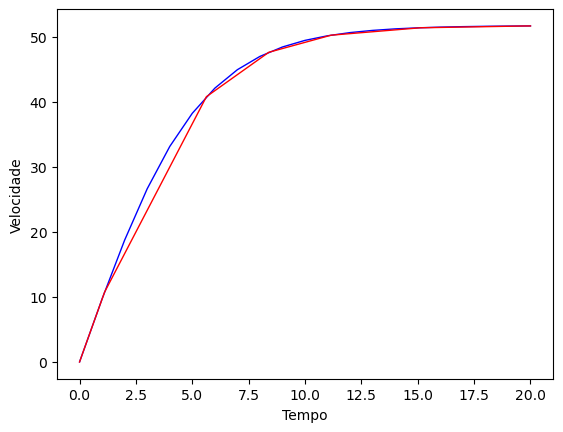

In [3]:
def quedalivre_analitico(t):
    g = 9.81
    cd = 0.25
    m = 68.1
    v = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t)
    return v

treal = np.linspace(0, 20, 21)
vreal = quedalivre_analitico(treal)

# podemos comparar a solucao numerica obtida anteriormente com a solucao analitica:
plt.plot(treal, vreal, '-b', tempo , velocidade, '-r', lw=1)
plt.xlabel('Tempo')
plt.ylabel('Velocidade')

Text(0, 0.5, 'Velocidade')

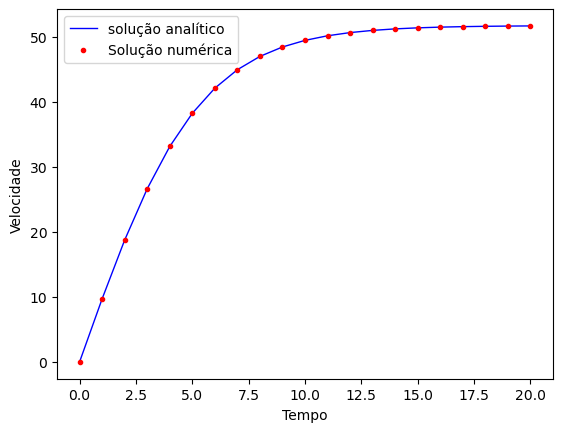

In [4]:
# vamos amostrar a solução numérica nos mesmos pontos que a solução analítica:

sol_scipy = solve_ivp(quedalivre_edo, y0 = [v0], t_span = [0,20], t_eval = treal)
tempo = sol_scipy.t
velocidade = sol_scipy.y[0]

plt.plot(treal, vreal, '-b', tempo , velocidade, '.r', lw=1)
plt.legend(['solução analítico', 'Solução numérica'])
plt.xlabel('Tempo')
plt.ylabel('Velocidade')

<a id=CHAPRA>[CHAPRA] CHAPRA, S. C. *Métodos Numéricos Aplicados com MATLAB para Engenheiros e Cientistas*, 3ª ed. 2013</a>

### Exercício

Determine a solução da seguinte equação diferencial ordinária:

$
\dfrac{dy}{dx} = \dfrac{2x}{y^2}
$

com condição inicial $y(0) = 3$ no intervalo de 0 a 100.

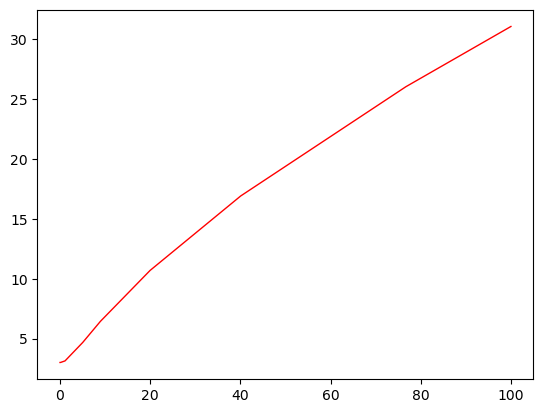

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def edo(t,y):
    return 2*t/y**2
    
sol = solve_ivp(edo, y0 = [3], t_span = [0,100])

plt.plot(sol.t, sol.y[0], 'r', lw=1)

### Exercício: Modelo logístico


O modelo logístico é muitas vezes utilizado para descrever o crescimento de uma população em um ambiente com recursos limitados.
Neste modelo a taxa de crescimento populacional se torna menor à medida que o tamanho da população se aproxima de um máximo imposto por recursos limitantes no ambiente, conhecido como capacidade de suporte ($K$) e pode ser descrito pela equação diferencial abaixo:

\begin{equation}
\dfrac{dN}{dt} = r \left(\dfrac{K - N}{K}\right)N
\end{equation}

onde $r$ é a taxa de crescimento.

A solução analítica é dada por:

\begin{equation}
N(t) = \dfrac{N_0 \cdot K}{K - N_0 e^{-rt} + N_0}
\end{equation}

onde $N_0$ é a população no instante $t= 0$.

![crescimentologistico](figuras/ajuste-curvas-fig02.png)

Simule o crescimento de uma população com $r = 0,02$ e $K = 100$ e para diversos valores de $N_0$ (1, 50, 150, 200) no intervalo de [0, 600].

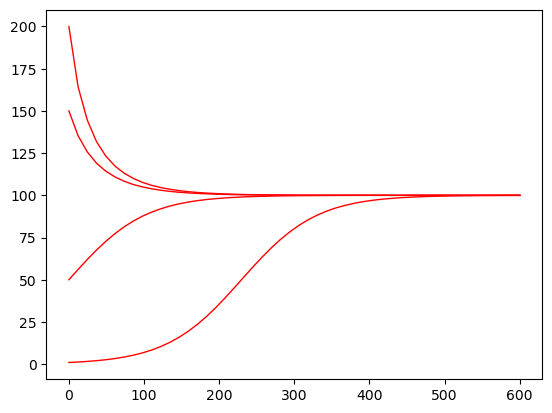

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def crescimento_logistico_edo(t,N):
    r = 0.02
    K = 100
    return N*r*(K - N)/K

t = np.linspace(0,600)
for y0 in [1, 50, 150, 200]:
    sol = solve_ivp(crescimento_logistico_edo, y0 = [y0], t_span = [0,600], t_eval=t)
    plt.plot(sol.t, sol.y[0], 'r', lw=1)